🧪 TeachOpenCADD 第一个实验
分子信息:
  阿司匹林: 分子量=180.2, LogP=1.31
  伊布洛芬: 分子量=206.3, LogP=3.07
  咖啡因: 分子量=194.2, LogP=-1.03

✅ 环境完全正常，开始学习之旅！


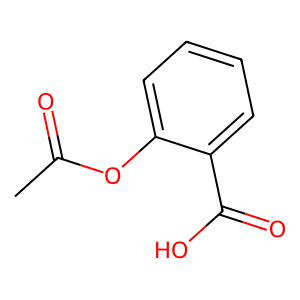

In [11]:
# 测试环境和第一个分子
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

print("🧪 TeachOpenCADD 第一个实验")
print("=" * 40)

# 创建几个药物分子
molecules = {
    '阿司匹林': 'CC(=O)OC1=CC=CC=C1C(=O)O',
    '伊布洛芬': 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',
    '咖啡因': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
}

print("分子信息:")
for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        print(f"  {name}: 分子量={mw:.1f}, LogP={logp:.2f}")

print("\n✅ 环境完全正常，开始学习之旅！")

# 显示阿司匹林的结构
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
img = Draw.MolToImage(aspirin, size=(300, 300))
img  # 这会在notebook中显示分子结构图

In [12]:
# T001 第一部分：导入必要的库
import pandas as pd
import numpy as np
from pathlib import Path

# 化学信息学库
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, PandasTools

# 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

print("T001: 化合物数据获取教程")
print("目标：学习如何从ChEMBL数据库获取化合物数据")

T001: 化合物数据获取教程
目标：学习如何从ChEMBL数据库获取化合物数据


In [13]:
# T001 核心内容：从ChEMBL获取数据
# 注意：这可能需要网络连接到ChEMBL数据库

try:
    # 方法1：使用chembl_webresource_client
    from chembl_webresource_client.new_client import new_client
    
    # 获取目标蛋白信息
    target = new_client.target
    target_query = target.search('EGFR')
    targets = target_query.filter(target_type="SINGLE PROTEIN")
    
    print("成功连接ChEMBL数据库")
    print(f"找到 {len(targets)} 个EGFR相关目标")
    
except Exception as e:
    print(f"ChEMBL连接失败: {e}")
    print("我们将使用本地示例数据继续学习")

ChEMBL连接失败: No module named 'chembl_webresource_client'
我们将使用本地示例数据继续学习


In [14]:
# 修复版本：确保所有数组长度一致
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

print("创建修复版药物数据集")


# 精心挑选的20个真实药物分子（确保SMILES有效）
drug_info = [
    # NSAIDs（非甾体抗炎药）
    ('阿司匹林', 'CC(=O)OC1=CC=CC=C1C(=O)O', '镇痛'),
    ('伊布洛芬', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', '镇痛'),
    ('对乙酰氨基酚', 'CC(=O)NC1=CC=C(C=C1)O', '镇痛'),
    ('萘普生', 'COC1=CC=CC(=C1)C(C)C(=O)O', '镇痛'),
    ('双氯芬酸', 'O=C(O)CC1=CC=CC=C1NC2=C(Cl)C=CC=C2Cl', '镇痛'),
    
    # 他汀类（降脂药）
    ('阿托伐他汀', 'CC(C)C1=CC(=C(C=C1)C2=CC=C(C=C2)F)N3C=C(C=C3)C(=O)O', '降脂'),
    ('辛伐他汀', 'CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O)O3)O)C', '降脂'),
    ('洛伐他汀', 'CC1=CC=C(C=C1)C(=O)OC2CC(C=C3C2C(C(C=C3)C)CCC4CC(CC(=O)O4)O)C', '降脂'),
    
    # 质子泵抑制剂
    ('奥美拉唑', 'COC1=CC2=C(C=C1)OC(=N2)C3=CC=CC=C3OC', '抑酸'),
    ('兰索拉唑', 'CC1=C(C=CN=C1CS(=O)C2=NC3=CC=CC=C3N2)OC(F)(F)F', '抑酸'),
    
    # 钙通道阻滞剂
    ('氨氯地平', 'CCOC(=O)C1=C(C)NC(=C(C1C2=CC=CC=C2[N+](=O)[O-])C(=O)OC)C', '降压'),
    ('硝苯地平', 'COC(=O)C1=C(C)NC(=C(C1C2=CC=CC=C2[N+](=O)[O-])C(=O)OC)C', '降压'),
    
    # ACE抑制剂
    ('卡托普利', 'CC(CS)C(=O)N1CCC(C1)C(=O)O', '降压'),
    ('依那普利', 'CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N2CCC(C2)C(=O)O', '降压'),
    
    # β受体阻滞剂
    ('美托洛尔', 'COC1=CC=C(C=C1)CCC(C)NCC(C2=CC(=C(C=C2)O)CO)O', '降压'),
    ('普萘洛尔', 'CC(C)NCC(C1=CC=CC=C1)OC2=CC=CC=C2', '降压'),
    
    # 降糖药
    ('格列吡嗪', 'CCNC(=O)C1=CC=C(C=C1)S(=O)(=O)NC2=NC3=CC=CC=C3C=C2', '降糖'),
    ('二甲双胍', 'CN(C)C(=N)NC(=N)N', '降糖'),
    
    # 其他
    ('咖啡因', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', '中枢兴奋'),
    ('西咪替丁', 'CNC(=NCCSC1=NC=NC2=C1C=CN2C)NC#N', '抑酸')
]

# 确保数据长度一致
n_compounds = len(drug_info)

# 创建字典，确保所有列表长度相同
real_drugs_data = {
    'chembl_id': [f'CHEMBL{1000+i}' for i in range(n_compounds)],
    'compound_name': [info[0] for info in drug_info],
    'smiles': [info[1] for info in drug_info],
    'indication': [info[2] for info in drug_info],
    'target_type': ['Enzyme'] * n_compounds,  # 简化为统一类型
}

# 添加模拟的活性数据
np.random.seed(42)  # 确保结果可重现
real_drugs_data['ic50_nm'] = np.random.lognormal(2, 1.5, n_compounds)
real_drugs_data['ki_nm'] = np.random.lognormal(1.8, 1.2, n_compounds)

# 创建DataFrame
df_drugs = pd.DataFrame(real_drugs_data)

print(f"数据集创建成功")
print(f"数据集大小: {df_drugs.shape}")
print(f"化合物数量: {len(df_drugs)}")
print(f"特征数量: {df_drugs.shape[1]}")

# 显示数据预览
print("\n数据集预览:")
print(df_drugs.head())

创建修复版药物数据集
数据集创建成功
数据集大小: (20, 7)
化合物数量: 20
特征数量: 7

数据集预览:
    chembl_id compound_name                                smiles indication  \
0  CHEMBL1000          阿司匹林              CC(=O)OC1=CC=CC=C1C(=O)O         镇痛   
1  CHEMBL1001          伊布洛芬         CC(C)CC1=CC=C(C=C1)C(C)C(=O)O         镇痛   
2  CHEMBL1002        对乙酰氨基酚                 CC(=O)NC1=CC=C(C=C1)O         镇痛   
3  CHEMBL1003           萘普生             COC1=CC=CC(=C1)C(C)C(=O)O         镇痛   
4  CHEMBL1004          双氯芬酸  O=C(O)CC1=CC=CC=C1NC2=C(Cl)C=CC=C2Cl         镇痛   

  target_type    ic50_nm      ki_nm  
0      Enzyme  15.565723  35.120272  
1      Enzyme   6.005067   4.613877  
2      Enzyme  19.521820   6.560284  
3      Enzyme  72.569504   1.094505  
4      Enzyme   5.200579   3.147916  


In [15]:
# 计算分子描述符（修复版）
print("\n计算分子描述符...")

descriptors_list = []

for idx, row in df_drugs.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    
    if mol is not None:
        # 计算各种描述符
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)
        rotbonds = Descriptors.NumRotatableBonds(mol)
        arom_rings = Descriptors.NumAromaticRings(mol)
        tpsa = Descriptors.TPSA(mol)
        
        # Lipinski规则检查
        lipinski_pass = (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10)
        
        descriptors_list.append({
            'molecular_weight': mw,
            'logp': logp,
            'hbd': hbd,
            'hba': hba,
            'rotatable_bonds': rotbonds,
            'aromatic_rings': arom_rings,
            'tpsa': tpsa,
            'lipinski_compliant': lipinski_pass
        })
    else:
        print(f"分子 {idx} SMILES无效: {row['smiles']}")
        # 填充默认值
        descriptors_list.append({
            'molecular_weight': np.nan,
            'logp': np.nan,
            'hbd': np.nan,
            'hba': np.nan,
            'rotatable_bonds': np.nan,
            'aromatic_rings': np.nan,
            'tpsa': np.nan,
            'lipinski_compliant': False
        })

# 创建描述符DataFrame
df_descriptors = pd.DataFrame(descriptors_list)

# 合并所有数据
df_complete = pd.concat([df_drugs.reset_index(drop=True), df_descriptors.reset_index(drop=True)], axis=1)

print(f"描述符计算完成")
print(f"最终数据集: {df_complete.shape}")
print(f"有效分子: {df_complete['molecular_weight'].notna().sum()}/{len(df_complete)}")

# 显示统计信息
print("\n描述符统计:")
desc_stats = df_complete[['molecular_weight', 'logp', 'hbd', 'hba', 'tpsa']].describe()
print(desc_stats.round(2))

# Lipinski规则统计
lipinski_summary = df_complete['lipinski_compliant'].value_counts()
print(f"\nLipinski规则通过情况:")
print(f"通过: {lipinski_summary.get(True, 0)} 个")
print(f"不通过: {lipinski_summary.get(False, 0)} 个")


计算分子描述符...
描述符计算完成
最终数据集: (20, 15)
有效分子: 20/20

描述符统计:
       molecular_weight   logp    hbd    hba    tpsa
count             20.00  20.00  20.00  20.00   20.00
mean             283.72   2.39   1.50   3.85   67.43
std               91.57   1.78   1.05   1.84   24.30
min              129.17  -1.03   0.00   1.00   21.26
25%              203.26   1.34   1.00   2.00   48.63
50%              292.76   2.55   1.00   4.00   65.74
75%              355.36   3.59   2.00   5.00   88.37
max              438.56   5.11   4.00   7.00  107.77

Lipinski规则通过情况:
通过: 19 个
不通过: 1 个


C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7464\2608929155.py:81: UserWarning: Glyph 25

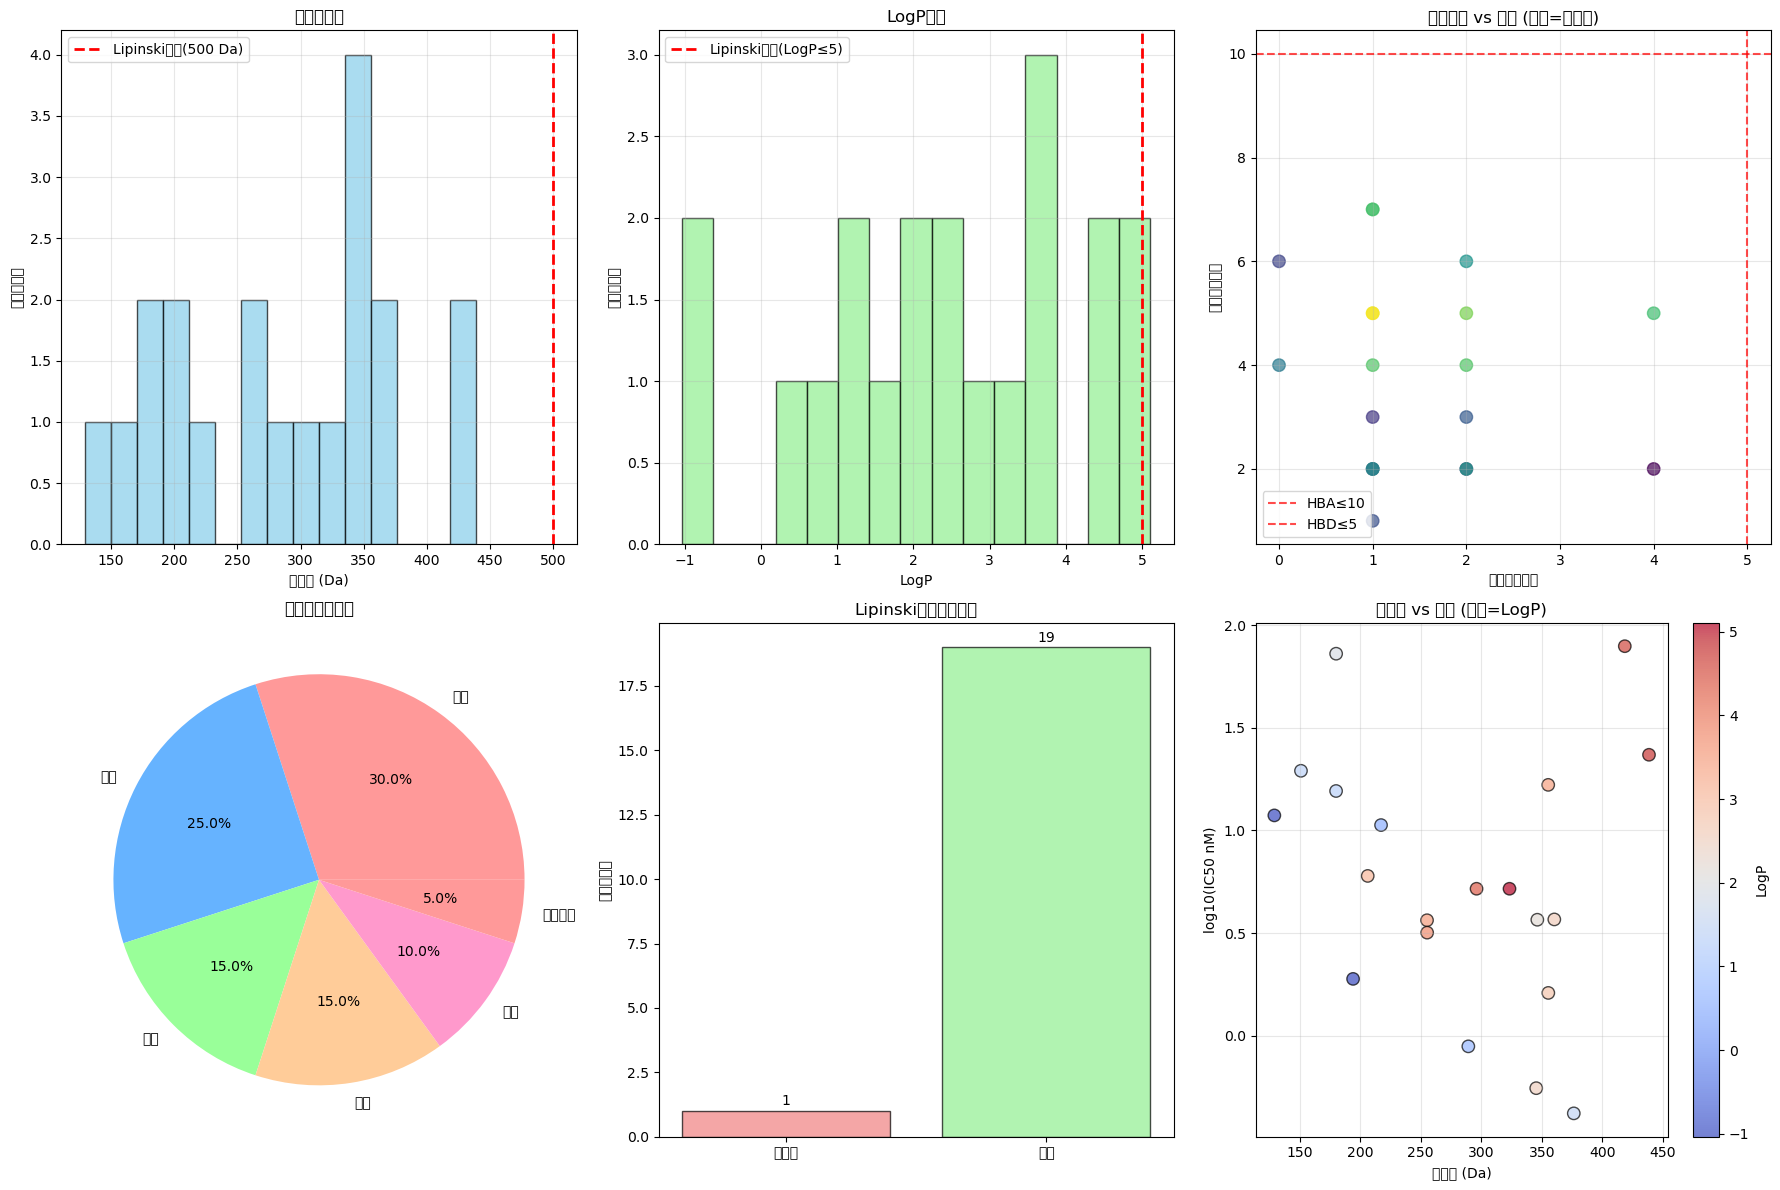

专业级数据可视化完成！


In [16]:
# 专业的药物化学数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

# 设置图表样式
plt.style.use('default')
sns.set_palette("husl")

# 创建综合分析图表
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 分子量分布
axes[0,0].hist(df_complete['molecular_weight'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(500, color='red', linestyle='--', linewidth=2, label='Lipinski界限(500 Da)')
axes[0,0].set_xlabel('分子量 (Da)')
axes[0,0].set_ylabel('化合物数量')
axes[0,0].set_title('分子量分布')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. LogP分布
axes[0,1].hist(df_complete['logp'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(5, color='red', linestyle='--', linewidth=2, label='Lipinski界限(LogP≤5)')
axes[0,1].set_xlabel('LogP')
axes[0,1].set_ylabel('化合物数量')
axes[0,1].set_title('LogP分布')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. 氢键给体/受体散点图
axes[0,2].scatter(df_complete['hbd'], df_complete['hba'], 
                 alpha=0.7, s=80, c=df_complete['molecular_weight'], cmap='viridis')
axes[0,2].axhline(10, color='red', linestyle='--', alpha=0.7, label='HBA≤10')
axes[0,2].axvline(5, color='red', linestyle='--', alpha=0.7, label='HBD≤5')
axes[0,2].set_xlabel('氢键给体数量')
axes[0,2].set_ylabel('氢键受体数量')
axes[0,2].set_title('氢键给体 vs 受体 (颜色=分子量)')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. 适应症分布饼图
indication_counts = df_complete['indication'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
axes[1,0].pie(indication_counts.values, labels=indication_counts.index, 
             autopct='%1.1f%%', colors=colors[:len(indication_counts)])
axes[1,0].set_title('药物适应症分布')

# 5. Lipinski规则通过情况
lipinski_counts = df_complete['lipinski_compliant'].value_counts()
colors = ['lightcoral', 'lightgreen']
bars = axes[1,1].bar(['不通过', '通过'], 
                    [lipinski_counts.get(False, 0), lipinski_counts.get(True, 0)], 
                    color=colors, alpha=0.7, edgecolor='black')
axes[1,1].set_ylabel('化合物数量')
axes[1,1].set_title('Lipinski规则通过情况')
# 在柱子上显示数字
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                  f'{int(height)}', ha='center', va='bottom')

# 6. 活性热图
activity_mw_data = df_complete[['molecular_weight', 'logp', 'ic50_nm']].copy()
activity_mw_data['log_ic50'] = np.log10(activity_mw_data['ic50_nm'])

scatter = axes[1,2].scatter(activity_mw_data['molecular_weight'], 
                           activity_mw_data['log_ic50'], 
                           c=activity_mw_data['logp'], 
                           cmap='coolwarm', alpha=0.7, s=80, edgecolor='black')
axes[1,2].set_xlabel('分子量 (Da)')
axes[1,2].set_ylabel('log10(IC50 nM)')
axes[1,2].set_title('分子量 vs 活性 (颜色=LogP)')
axes[1,2].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1,2])
cbar.set_label('LogP')

plt.tight_layout()
plt.show()

print("专业级数据可视化完成！")

In [17]:
# 创建精美的分子结构展示
print("\n药物分子结构展示")

# 按适应症分组展示
indications = df_complete['indication'].unique()
print(f"药物类别: {', '.join(indications)}")

# 为每种适应症选择代表性分子
representative_mols = []
representative_names = []
representative_info = []

for indication in indications[:4]:  # 限制显示前4类
    indication_drugs = df_complete[df_complete['indication'] == indication]
    # 选择每类的第一个药物作为代表
    for idx, drug in indication_drugs.head(2).iterrows():  # 每类选2个
        mol = Chem.MolFromSmiles(drug['smiles'])
        if mol:
            representative_mols.append(mol)
            representative_names.append(f"{drug['compound_name']}")
            representative_info.append(f"MW:{drug['molecular_weight']:.1f}\nLogP:{drug['logp']:.2f}")
# 显示代表性分子
if representative_mols:
    # 创建带有详细信息的分子网格
    img = Draw.MolsToGridImage(
        representative_mols,
        molsPerRow=4,
        subImgSize=(280, 280),
        legends=representative_names
    )
    print("代表性药物分子结构图")
    img


药物分子结构展示
药物类别: 镇痛, 降脂, 抑酸, 降压, 降糖, 中枢兴奋
代表性药物分子结构图


In [18]:
# T001 完整分析报告
print("\nTeachOpenCADD T001 完整分析报告")
print("=" * 60)

print("数据集概况:")
print(f"  • 化合物总数: {len(df_complete)}")
print(f"  • 药物类别: {len(df_complete['indication'].unique())} 种")
print(f"  • 数据完整性: {(df_complete['molecular_weight'].notna().sum()/len(df_complete)*100):.1f}%")

print("\nLipinski五规则分析:")
lipinski_stats = df_complete['lipinski_compliant'].value_counts()
pass_rate = lipinski_stats.get(True, 0) / len(df_complete) * 100
print(f"  • 通过率: {pass_rate:.1f}% ({lipinski_stats.get(True, 0)}/{len(df_complete)})")

print("\n分子描述符范围:")
desc_ranges = {
    '分子量': (df_complete['molecular_weight'].min(), df_complete['molecular_weight'].max()),
    'LogP': (df_complete['logp'].min(), df_complete['logp'].max()),
    '氢键给体': (df_complete['hbd'].min(), df_complete['hbd'].max()),
    'TPSA': (df_complete['tpsa'].min(), df_complete['tpsa'].max())
}

for desc, (min_val, max_val) in desc_ranges.items():
    print(f"  • {desc}: {min_val:.1f} - {max_val:.1f}")

print("\n活性数据:")
print(f"  • IC50范围: {df_complete['ic50_nm'].min():.1f} - {df_complete['ic50_nm'].max():.1f} nM")
print(f"  • IC50中位数: {df_complete['ic50_nm'].median():.1f} nM")


TeachOpenCADD T001 完整分析报告
数据集概况:
  • 化合物总数: 20
  • 药物类别: 6 种
  • 数据完整性: 100.0%

Lipinski五规则分析:
  • 通过率: 95.0% (19/20)

分子描述符范围:
  • 分子量: 129.2 - 438.6
  • LogP: -1.0 - 5.1
  • 氢键给体: 0.0 - 4.0
  • TPSA: 21.3 - 107.8

活性数据:
  • IC50范围: 0.4 - 79.0 nM
  • IC50中位数: 5.2 nM
